# Semana 9 do Aceleradev DS Codenation

### Professor: Kazuki Yokoyama | Tema: Classificação

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
np.random.seed(1000)

In [64]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Predict
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, #clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

**[Data Catalog](https://cloud.google.com/data-catalog?hl=pt-br)** serve como um repositório de conhecimento unificado

## O que é Classificar?

**Classificar** é **ROTULAR**. Quando temos uma variável que possui cores como valores, ou números (sejam eles com grau intervalar ou não) por exemplo, temos classificacões que tal variável categórica pode assumir. E a idéia de um modelo preditivo de classificação é justamente **aprender como rotular** de acordo com outras variáveis categóricas.

## Tipos de Classificação

A mais simples de todas é a **Classificação Binária**. Nela, temos apenas **duas classes**, sendo chamadas de **classe POSITIVA** e **classe NEGATIVA**. Basicamente, podemos perceber essa classificação como é ou não é.

Agora, quando aumentamos o número de classes para $k$ classes, passamos para um tipo **multiclasses**

## Geometricamente falando...

![decision-boundary](https://miro.medium.com/max/1012/1*i_oYgWjPbXbg3Z2uQLAmtw.png)

Podemos falar de classificação como a arte de gerar uma linha que separa as classes. Essa linha é chamada **fronteira de decisão**. Olhando para a figura, percebemos que a fronteira separa muito bem as duas classes, mas erra em alguns pontos. Porém, esses pontos nos ajudam a criar algumas métricas de avaliação desse modelo de classificação

## Matriz de Confusão

É uma representação tabular dos erros e acertos de um classificador, sumarizando as quantidade dos pontos classificados de maneira errada e correta.

![confusion-matrix](https://drive.google.com/uc?export=download&id=1Li5Ep-5PRpua2vtQLXHvltaeGsr-lftZ)

Similar ao **Teste de Hipóteses** temos os mesmos dois tipos de erros na matriz de confusão:

- Falso Positivo (FP): representa o **Erro Tipo I**. Nele, classificamos um valor **verdadeiramente negativo** como **positivo**

- Falso Negativo (FN): representa o **Erro Tipo II**. Nesse, classificamos um valor **verdadeiramente positivo** como **negativo**

Olhando a matriz, fica claro o objetivo em **maximizar** (TP) e (TN) e **minimizar** (FN) e (FP). Entretanto, em determinador momentos, será possível minimizar apenas (FP) ou (FN). Nesse momento, deve-se priorizar qual é menos custoso.

Como dito, os pontos errados ajudam a gerar algumas métricas importantes de avaliação do modelo classificatório, mas os (TP) e (TN) também ajudam, como podemos ver na imagem abaixo:

![confusion-matrix-metrics](https://drive.google.com/uc?export=download&id=1GUQs3pT07UJVGTINPNEHE0ACrr1_FYOk)

Com o auxílio da imagem, podemos entender essas métricas:

- precision

$$\frac{TP}{TP+FP}=1-FDR$$

- false discovery rate (FDR)

$$\frac{FP}{TP+FP}=1-precision$$

- miss rate

$$\frac{FN}{FN+TP}=1-recall$$

- recall (sensitivity), ou True Positive Ratio - TPR

$$\frac{TP}{FN+TP}=1-\text{miss rate}$$

- negative predictive value (NPV)

$$\frac{TN}{TN+FN}=1-\text{false omission rate}$$

- false omission rate

$$\frac{FN}{TN+FN}=1-NPV$$

- fall out, ou False Positive Ratio - FPR

$$\frac{FP}{FP+TN}=1-specificity$$

- specificity

$$\frac{TN}{FP+TN}=1-\text{fall out}$$

Temos outras duas métricas importantes:

- accuracy

$$\frac{TP+TN}{P+N}\text{, sendo P os POSITIVOS e N os NEGATIVOS}$$

- $F_1-score$

$$\frac{2\times precision \times recall}{precision+recall}$$

## Curva ROC

![auc](https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png)

![roc](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/ROC_space-2.png/1024px-ROC_space-2.png)

A curva **ROC** é feita num gráfico cartesiano onde o x representa o **fall out $\frac{FP}{FP+TN}$**, e o y representa **recall $\frac{TP}{TP+FN}$**. Essa curva pode ser vista como uma fronteira de decisão, sendo que cada problema **tem uma curva ROC diferente**. Ou seja, estamos falando de uma curva que abaixo dela temos uma probabilidade. Por exemplo, para um problema que existe .6 de chance de ser classificado como uma classe **POSITIVA**, qualquer ponto acima dessa curva de área .6 será classificado como **POSITIVO**. Já os pontos que caem abaixo da curva, justamente a região **NEGATIVA** da curva ROC.

Idealmente, um classificador deveria ser um ponto apenas: o ponto (0, 1). Esse representa um **recall=1**. No entando, observamos uma curva que vai de (0, 0) até (1, 1):

- (0, 0)
    
    $$recall=\frac{TP}{TP+FN}=0\therefore TP=0$$
    
    $$\text{fall out}=\frac{FP}{TN+FP}=0\therefore FP=0$$
    
    nenhum dado é previsto como sendo da classe negativa


- (1, 1)
    
    $$recall=\frac{TP}{TP+FN}=1\therefore TP=TP+FN$$
    
    $$\text{fall out}=\frac{FP}{TN+FP}=1\therefore FP=TN+FP$$
    
    nenhum dado é previsto como sendo da classe positiva

O classificador trivial *random guess* é um classificador que faz classificações aleatórias, tão somente baseadas nas proporções de dados da classe negativa e positiva do *data set*. O seu desempenho é capturado pela curva $y = x$ no plano cartesiano **recall x fall out**. Como queremos ter um modelo que seja melhor que o classificador aleatório, **devemos buscar um classificador cujo ROC seja uma curva sempre acima da reta $y = x$**. Curvas abaixo da reta $y = x$ significam que o classificador se comporta pior do que chutes aleatórios sobre as classes.

Apesar de visualmente ser fácil avaliar o desempenho de um classificador usando a curva ROC, é difícil comparar o desempenho geral de múltiplos classificadores. Uma forma de sumarizar o desempenho do classificador usando o ROC é através da **área embaixo da curva ROC: AUC (*Area Under Curve*)**.

## Criando Dataset para Classificação

In [156]:
from sklearn.datasets import make_blobs

Vamos gerar um conjunto de dados com 500 indivíduos e 3 classes

In [157]:
X, Y = make_blobs(n_samples=500, centers=2, cluster_std=2.)

In [158]:
X.shape, Y.shape

((500, 2), (500,))

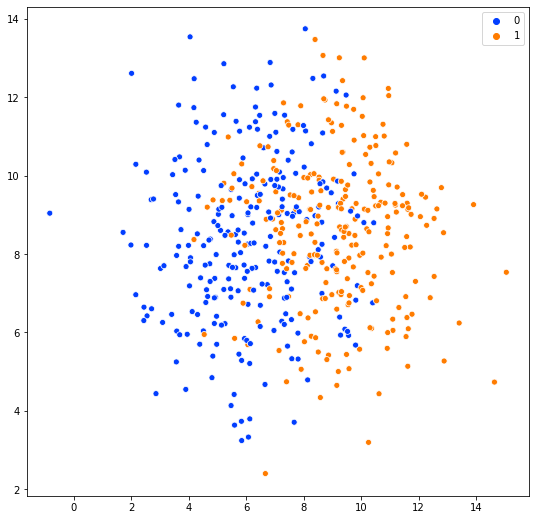

In [159]:
plt.figure(figsize=(9, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='bright')
plt.show()

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=.2)

In [162]:
x_treino.shape, x_teste.shape

((400, 2), (100, 2))

## Regressão Logística

Esse modelo é muito empregado em problemas binários, mas não unicamente usado, necessariamente, em modelos binários.

Nesse modelo, a função utilizada retorna uma probabilidade: ser **positivo** ou **negativo**, e é escrita abaixo:

$$p(X) = \frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}}$$

Olhando para os coeficientes $\beta_0, \beta_1$, percebemos que eles não são lineares. E para uma regressão linear, isso não serve. Então, devemos fazer uma matemágica para deixar essa função linearizável. Diante disso:

$$\ln{\frac{p(X)}{1 - p(X)}} = \beta_{0} + \beta_{1}X$$

Agora é possível aplicar uma regressão, pois é uma função linear nos parâmetros $\beta_0, \beta_1$.

![logistic](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Então, com a função linearizada, obtemos os coeficientes $\beta_0, \beta_1$, e podemos gerar um gráfico tal qual o de cima. Perceba que $p(x)$ está condicionado entre $[0, 1]$. Para uma probabilidade, que conveniente é o que estamos lidando, é muito oportuno. Assim, podemos encontrar a **probabilidade de $x$ ser de classe positiva ou negativa**. Se $p(x)\geq.5$, $x$ tem maior chance de ser de classe **positiva** $Y=1$. Se for menor, chance de ser **negativa** $Y=0$. Mas esse .5 pode ser modificado se quisermos.

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
reg_log = LogisticRegression()

**treino**

In [165]:
reg_log.fit(x_treino, y_treino)

LogisticRegression()

In [166]:
reg_log.intercept_

array([-6.37143396])

In [167]:
reg_log.coef_

array([[0.82618192, 0.01100215]])

In [168]:
reg_log.classes_

array([0, 1])

**teste**

In [169]:
previsto_log = reg_log.predict(x_teste)

In [170]:
pd.DataFrame(data={
    '1': x_teste[:, 0],
    '2': x_teste[:, 1],
    'target_previsto': previsto_log,
    'target_real': y_teste
}).head(7)

,1,2,target_previsto,target_real
0,4.969726,6.409559,0,0
1,3.993430,8.217654,0,0
2,12.276174,8.729275,1,1
3,5.943977,7.377185,0,0
4,7.825717,9.432110,1,1
5,7.223531,9.114203,0,1
6,7.411204,6.892287,0,0


Podemos calcular algumas probabilidades interessantes com o modelo treinado

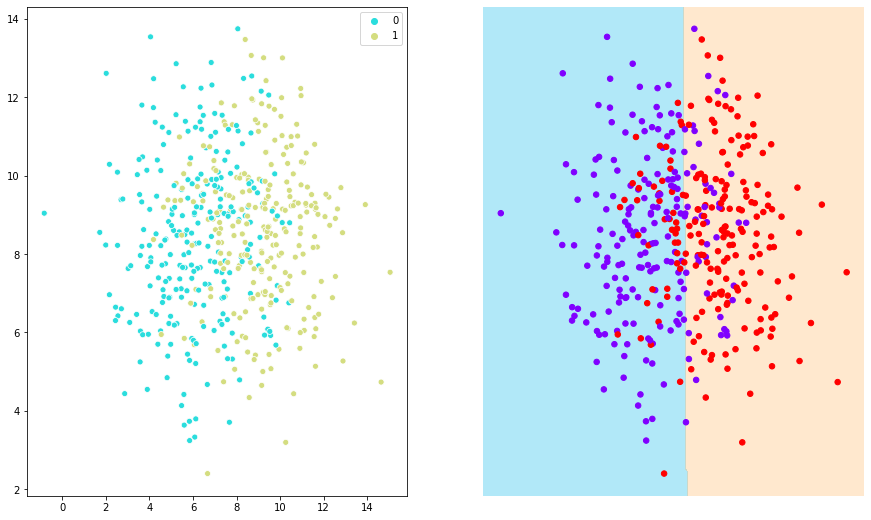

In [171]:
fig, g = plt.subplots(1, 2, figsize=(15, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='rainbow', ax=g[0])
visualize_classifier(reg_log, x_treino, y_treino, ax=g[1])
plt.show()

**Qual classe um determinado ponto pertence?**

Ponto: (12.5, 5)

- olhando para o gráfico acima, podemos perceber que esse ponto percente à classe 1

Ponto: (4., 12.)

- olhando para o gráfico acima, podemos perceber que esse ponto pertence à classe 0

In [175]:
reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))

array([[0.01779555, 0.98220445],
       [0.94953443, 0.05046557]])

In [176]:
print('Ponto (12.5, 5.):\n')
print(f'classe 0: {reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))[0,0]:.3f}')
print(f'classe 1: {reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))[0,1]:.3f}')

Ponto (12.5, 5.):

classe 0: 0.018
classe 1: 0.982


In [177]:
print('Ponto (4., 12.):\n')
print(f'classe 0: {reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))[1,0]:.3f}')
print(f'classe 1: {reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))[1,1]:.3f}')

Ponto (4., 12.):

classe 0: 0.950
classe 1: 0.050


Como é possível perceber, as probabilidades são muito maiores nas classes que acreditamos que os pontos pertencem de acordo com o gráfico fronteiriço.

Tem como saber qual classe o ponto pertence, diferente da probabilidade de pertencimento. Basta usar o `predict` para um ponto só

Ponto (12.5, 5.):

In [179]:
reg_log.predict(np.array(([12.5, 5.])).reshape(1, -1))

array([1])

## Métricas

Vamos aplicar as métricas da **Matriz de Confusão** e **Curva ROC** aos resultados desse modelo de regressão logística

**Accuracy**

Com essa métrica, podemos saber **com que frequência esse classificador está correto**

In [180]:
from sklearn.metrics import accuracy_score

In [181]:
accuracy_score(y_pred=previsto_log, y_true=y_teste)

0.81

Vemos que nosso classificador está certo em 81% dos casos. Ou seja, a cada 100 pontos, ele consegue classificar como *classe 0 ou classe 1*, corretamente, em 93 deles.

**Confusion Matrix**

In [182]:
from sklearn.metrics import confusion_matrix

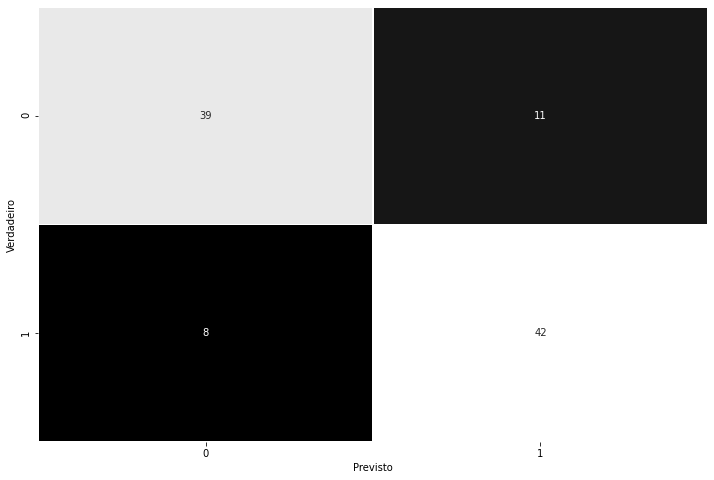

In [183]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_pred=previsto_log, y_true=y_teste), 
            annot=True, 
            cmap='gray', 
            linewidths=.7, 
            cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

Nessa matriz, temos:

- (TN) é 0 e foi classificado como 0 = 39
- (TP) é 1 e foi classificado como 1 = 42
- (FP) é 0 mas foi classificado como 1 = 11
- (FN) é 1 mas foi classificado como 0 = 8

Outra forma de ler:

- de 50 (N), o modelo previu 39 corretamente
- de 50 (P), o modelo previu 42 corretamente

Nessa última análise, fica fácil perceber o **Accuracy** de 81%

**Recall, Sensitivity, ou TPR (True Positive Ratio)**

como escrito lá em cima:

$$\frac{TP}{TP+FN}$$

Com essa métrica, queremos saber **quando é um valor realmente POSITIVO, com que frequência o classificador ACERTA**. Essa métrica é usada quando objetivo é limitar a quantidade de falso negativos. Ou seja, quando temos 1 mas são classificados como 0 (falso 0).

In [185]:
from sklearn.metrics import recall_score

In [186]:
recall_score(y_pred=previsto_log, y_true=y_teste)

0.84

Ou seja, de 100% dos dados **realmente POSITIVOS**, ou seja, 50 valores, o classificador acerta 84% 

**Fall Out, ou FPR (False Positive Ratio)**

como escrito lá em cima:

$$\frac{FP}{TN+FP}$$

Com essa métrica, queremos saber **quando é um valor realmente NEGATIVO, com que frequência o classificador ERRA**

In [187]:
11/50

0.22

Ou seja, de 50 dados **realmente NEGATIVOS**, o classificador erra em 22% deles

**Precision**

como escrito lá em cima:

$$\frac{TP}{TP+FP}$$

Com essa métrica, queremos saber **quando o modelo prevê um valor POSITIVO, com que frequência o classificador ACERTA**. Essa métrica é usada quando o objetivo é limitar a quantidade de (FP). Ou seja, quando queremos limitar a quantidade de 0 que são classificados como 1 (falsos 1).

In [188]:
from sklearn.metrics import precision_score

In [190]:
precision_score(y_pred=previsto_log, y_true=y_teste)

0.7924528301886793

Ou seja, quando o modelo prevê um valor **POSITIVO**, 53 valores, ele acerta 79% deles

**$F_1-score$**

como escrito lá em cima:

$$\frac{2\times precision \times recall}{precision+recall}$$

Essa métrica é interessante quando queremos analisar, ao mesmo tempo, o **recall** e a **precision**. Ela representa a **média harmônica** entre as duas métricas

In [191]:
from sklearn.metrics import f1_score

In [192]:
f1_score(y_pred=previsto_log, y_true=y_teste)

0.8155339805825242

## Dados Desbalanceados